<a href="https://colab.research.google.com/github/Konwalai1111/BSC_DPDM2025/blob/main/Ch3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
flood = pd.read_csv('/content/drive/MyDrive/DPDM68/data/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

### Check Missing Data

In [ ]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [ ]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop Record ที่มี missing ออก

drop ถ้ามี missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้

- dfo_country
- dfo_other_country
- dfo_began
- dfo_ended
- dfo_dead
- dfo_cause
- dfo_severity

In [ ]:
flood_drop2 = flood.dropna(subset=['dfo_country','dfo_other_country','dfo_began',
                                   'dfo_ended','dfo_dead','dfo_cause','dfo_severity'])
flood_drop2.shape

(637, 23)

In [ ]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


## เติม Dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood[~flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
886,DFO_4581_From_20180310_to_20180314,4581,std,NaN,Croatia,Bosnia and Herzegovina,16.947210,44.734938,3/10/18,3/14/18,...,"Snowmelt, Ice, Rain",1.0,1564.28,53495.0,50783.0,53495,1,2712,0,NaN
893,DFO_4597_From_20180325_to_20180408,4597,std,NaN,Greece,Bulgaria,26.671405,41.531705,3/25/18,4/8/18,...,Heavy rain,1.5,2818.83,57706.0,51639.0,57706,1,6067,0,NaN
897,DFO_4640_From_20180625_to_20180711,4640,std,NaN,India,Pakistan,75.143900,33.375200,6/25/18,7/11/18,...,Heavy rain,1.0,2104.94,224236.0,60172.0,224236,1,164064,0,NaN


### เติม Unknow ใน ``` dfo_other_country ```

In [ ]:
flood_filldummy = flood.fillna({'dfo_other_country':'Unknown'})
flood_filldummy.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


In [ ]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม ด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [ ]:
flood_fillmode = flood.fillna({'dfo_cause':'Heavy rain'})
flood_fillmode.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


In [ ]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม ด้วยตัวแทนของกลุ่ม

In [ ]:
flood.groupby(['dfo_severity','dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [ ]:
flood_sever1 = flood[flood['dfo_severity']==1.0]
flood_sever15 = flood[flood['dfo_severity']==1.5]
flood_sever2 = flood[flood['dfo_severity']==2.0]

In [ ]:
flood_sever1 = flood_sever1.fillna({'dfo_cause':'Heavy rain'})
flood_sever15 = flood_sever1.fillna({'dfo_cause':'Heavy rain'})
flood_sever2 = flood_sever1.fillna({'dfo_cause':'Tropical Storm, Surge'})

In [ ]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])
flood_fillgroup.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
5,DFO_1631_From_20000901_to_20000906,1631,std,0,China,0,113.483009,25.229313,9/1/00,9/6/00,...,Heavy rain,1.0,102.25,18.0,18.0,628,1,0,-610,NaN
9,DFO_1772_From_20010806_to_20010913,1772,std,0,Sudan,Ethiopia,34.427661,14.996666,8/6/01,9/13/01,...,Heavy rain,1.0,1384.61,11849.0,11849.0,11615,1,0,234,NaN


In [ ]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,243
dfo_country,0
dfo_other_country,315
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,3


## Noisy Data


### Binning

exploe data

In [ ]:
flood ['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


plot data

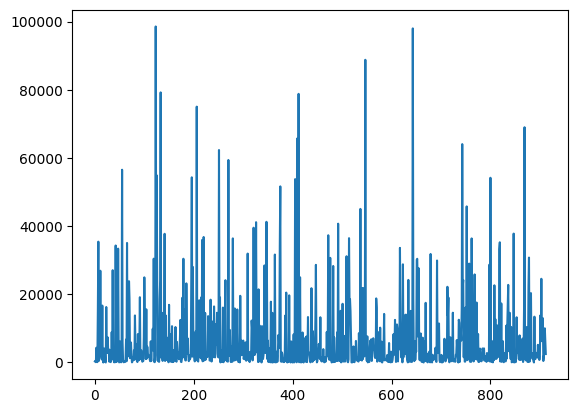

In [ ]:
plt.plot(flood['gfd_area'])

ใช้ Histogram ดู Bin ที่เหมาะสม

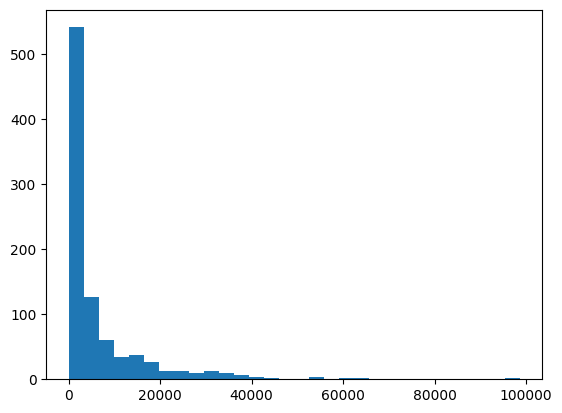

In [ ]:
plt.hist(flood['gfd_area'],30);

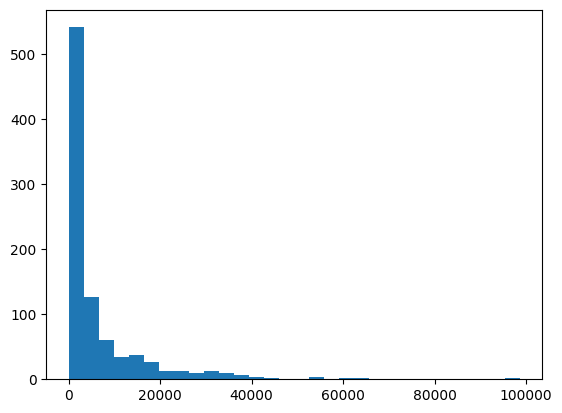

In [ ]:
outputhist = plt.hist(flood['gfd_area'],30)

In [ ]:
outputhist[1]

array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
       13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
       26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
       39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
       52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
       65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
       78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
       91977.77866667, 95262.69933333, 98547.62      ])

In [ ]:
def put_value_into_bins(value,bin_edge) :
    for i in range(len(bin_edge)-1) :
        if value >= bin_edge[i] and value < bin_edge[i+1] :
            new_val = bin_edge[i] + (bin_edge[i+1]-bin_edge[i])/2
    return new_val

In [ ]:
put_value_into_bins(7000,outputhist[1])

np.float64(8212.301666666666)

In [ ]:
put_value_into_bins(3000,outputhist[1])

np.float64(1642.4603333333332)

In [ ]:
import numpy as np

def put_value_into_bins(value,bin_edge) :
    new_val = np.nan # Initialize new_val to handle cases where no bin is matched
    for i in range(len(bin_edge)-1) :
        # For the last bin, include the upper bound to ensure all values are covered
        if i == len(bin_edge) - 2:
            if value >= bin_edge[i] and value <= bin_edge[i+1] :
                new_val = bin_edge[i] + (bin_edge[i+1]-bin_edge[i])/2
                break # Exit loop once a bin is found
        # For all other bins, use the [lower, upper) convention
        elif value >= bin_edge[i] and value < bin_edge[i+1] :
            new_val = bin_edge[i] + (bin_edge[i+1]-bin_edge[i])/2
            break # Exit loop once a bin is found
    return new_val

In [ ]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x: put_value_into_bins(x, outputhist[1]))

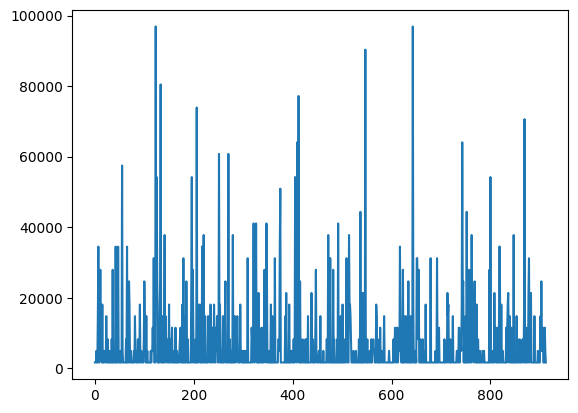

In [ ]:
plt.plot(flood['gfd_area_bin'])

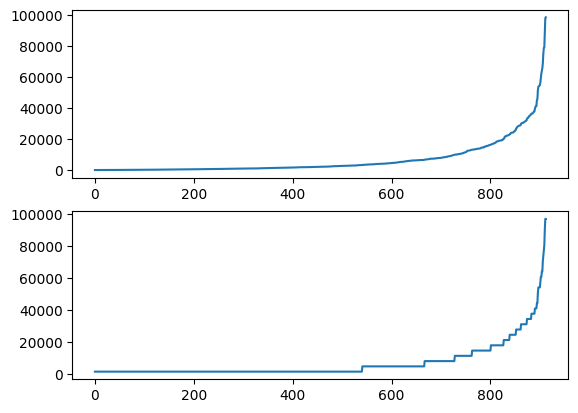

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop=True))

### Outliner Removal

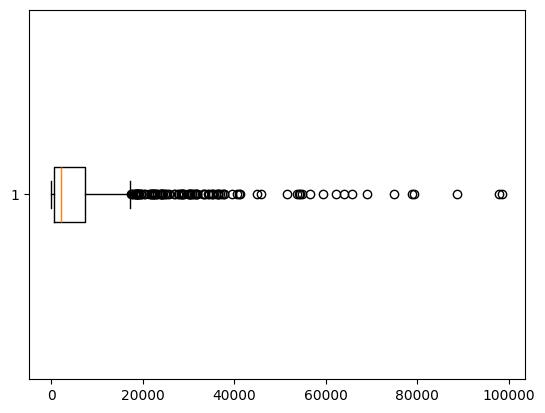

In [ ]:
plt.boxplot(flood['gfd_area'],vert=False);

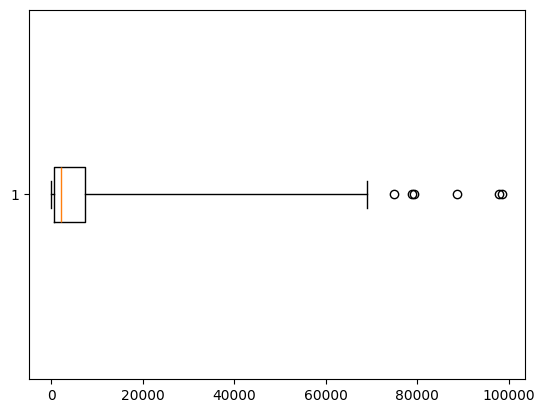

In [ ]:
plt.boxplot(flood['gfd_area'],vert=False,whis=10);

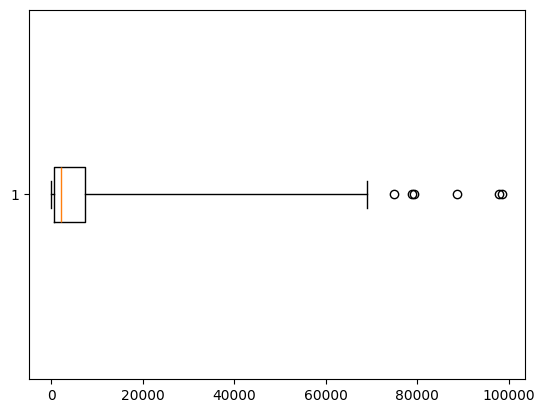

In [ ]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10)

In [ ]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [ ]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [ ]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliners

In [ ]:
flood_nooutliner = flood[flood['gfd_area']<
                         outputbox['whiskers'][1].get_xdata()[1]]

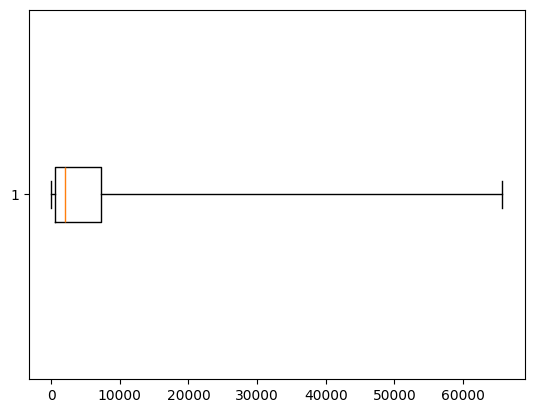

In [ ]:
outputbox = plt.boxplot(flood_nooutliner['gfd_area'],vert=False,whis=10)

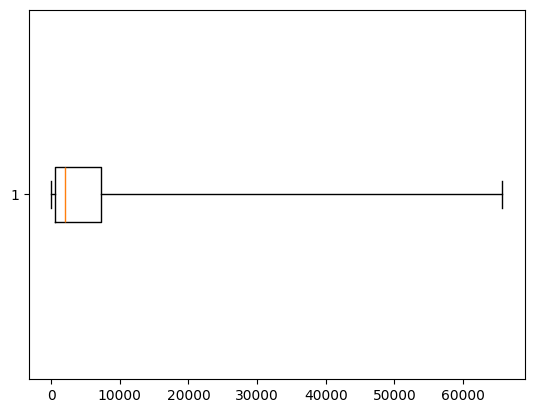

In [ ]:
outputbox2 = plt.boxplot(flood_nooutliner['gfd_area'],vert=False,whis=10)

ตามหาค่า outliners

In [ ]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

IndexError: index 0 is out of bounds for axis 0 with size 0

# Data Integration

Data exploration

ในกรณีที่อยากจัดการ Data
> project เป็นโครงการ
>
> Unit เป็น Type ของบ้าน

In [100]:
project_df = pd.read_csv('/content/drive/MyDrive/DPDM68/data/Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [101]:
for i in project_df.columns:
    print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [102]:
unit_df = pd.read_csv('/content/drive/MyDrive/DPDM68/data/Copy of opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [103]:
for i in unit_df.columns:
    print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more column to the table (X-Data Integration)

``` map() ```

In [104]:
project_df_dedup = project_df.drop_duplicates(subset = ['project_id'], keep='last')
unit_df = unit_df.merge(project_df_dedup[['project_id', 'propertytype_name_th',
                                                    'neighborhood_name_th', 'subdistrict_name_th',
                                                    'district_name_th', 'province_name_th']],
                         on='project_id',
                         how='left')

In [105]:
unit_df['project_id'].map(project_df.set_index('project_id')['name_th'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

## Deuplication

In [106]:
project_df.duplicated().any()

np.True_

In [107]:
project_df.duplicated().sum()

np.int64(2)

In [108]:
project_df[project_df.duplicated()]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
project_df.duplicated(subset = ['project_id'], keep=False).sum()

np.int64(6981)

In [111]:
project_df[project_df.duplicated(subset = ['project_id'], keep=False)].head(100).sort_values(by='project_id')

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
148,1763.0,5e54dbc4b33a1500123c692c,Baan Pruksa Hin Kong-Saraburi,บ้านพฤกษา หินกอง-สระบุรี,1,Detached House,บ้าน,1360000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,1.0,1.0,1.0,2020-02-25 15:33:08,NaN,2020-12-04 10:33:24,baania,https://baania.com/th/project/บ้านพฤกษา-หินกอง...,2023-06-11
257,23298.0,5e58d382de70880012efe107,Piman Tanee 4 Amnatcharoen,พิมานธานี 4 อำนาจเจริญ,20000,Twin house,บ้านแฝด,1000000.0,developer_2060,"Isaan Piman Group Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-02-28 15:46:58,2020-01-01 07:00:00,2020-12-04 10:33:21,baania,https://baania.com/th/project/พิมานธานี-4-อำนา...,2023-06-11
122,2023.0,5e6857f1c91cd30012894fe5,Alice Land,อลิซ แลนด์,4,Commercial,อาคารพาณิชย์,3990000.0,developer_10662,"HONGTAI GROUP CO., LTD.",...,1.0,NaN,1.0,1.0,2020-03-11 10:16:01,NaN,2022-11-21 16:30:03,baania,https://baania.com/th/project/อลิซ-แลนด์-5e685...,2023-06-11
276,14515.0,5e8466c9e146a400123ef189,Udomsuk Place Kabinburi,อุดมสุข เพลส กบินทร์บุรี,4,Commercial,อาคารพาณิชย์,1690000.0,5e8465ece146a400123ef182,"Udomsuk Kabinburi House and Land Co., Ltd.",...,1.0,NaN,1.0,1.0,2020-04-01 17:02:49,2020-01-01 07:00:00,2020-12-04 10:32:05,baania,https://baania.com/th/project/อุดมสุข-เพลส-กบิ...,2023-06-11
185,14528.0,5e846daae146a400123ef19e,The Privy 2,เดอะ ไพรวี่ 2,1,Detached House,บ้าน,1200000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,NaN,NaN,1.0,2020-04-01 17:32:10,2020-01-01 07:00:00,2020-12-04 10:32:05,baania,https://baania.com/th/project/เดอะ-ไพรวี่-2-5e...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,15255.0,project_9093,Pruksa Ville Onnut-Suvarnabhumi,พฤกษาวิลล์ อ่อนนุช-สุวรรณภูมิ,1,Detached House,บ้าน,2700000.0,developer_1026,"PRUKSA REAL ESTATE PUB CO., LTD.",...,1.0,NaN,NaN,1.0,2017-07-24 13:53:08,2019-01-01 07:00:00,2023-04-18 11:00:05,baania,https://baania.com/th/project/พฤกษาวิลล์-อ่อนน...,2023-06-11
240,3357.0,project_9392,Baan Rock Garden Airport Suvarnabhumi Phase 1,บ้านร็อคการ์เด้น แอร์พอร์ต สุวรรณภูมิ เฟส 1,20000,Twin house,บ้านแฝด,2100000.0,developer_2281,NaN,...,1.0,NaN,NaN,1.0,2017-08-29 09:08:49,2011-12-31 07:00:00,2020-12-04 10:37:34,baania,https://baania.com/th/project/บ้านร็อคการ์เด้น...,2023-06-11
263,17490.0,project_9792,Sansuk Town,แสนสุขทาวน์,3,Townhome,ทาวน์โฮม,3372000.0,developer_6321,"Prapattanachaikij Co.,Ltd.",...,1.0,NaN,1.0,1.0,2017-09-14 08:36:07,2015-12-01 07:00:00,2022-07-20 17:30:03,baania,https://baania.com/th/project/แสนสุขทาวน์-proj...,2023-06-11
132,7598.0,project_9953,Malin Village,มาลิน วิลเลจ,3,Townhome,ทาวน์โฮม,1600000.0,developer_6414,"WORLD INTER DEVELOPMENT CO., LTD.",...,1.0,1.0,1.0,1.0,2017-09-19 14:46:10,2018-01-01 07:00:00,2022-09-15 13:30:02,baania,https://baania.com/th/project/มาลิน-วิลเลจ-pro...,2023-06-11


ลบข้อมูลที่มี project_id ซ้ำกัน
โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด(ตัวล่าง)

In [112]:
project_df_dedup = project_df.drop_duplicates(subset = ['project_id'], keep='last')

map data ที่ไม่มี duplicate index

In [113]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [114]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

# HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ

('propertytype_name_th', 'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th', 'province_name_th')

In [10]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [11]:
unit_df['developer_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['developer_name_th'])
unit_df['neighborhood_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['neighborhood_name_th'])
unit_df['subdistrict_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['subdistrict_name_th'])
unit_df['district_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['district_name_th'])
unit_df['province_name_th'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['province_name_th'])

In [12]:
print(unit_df.columns)

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th_x', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'propertytype_name_th_y', 'neighborhood_name_th', 'subdistrict_name_th',
       'district_name_th', 'province_name_th', 'developer_name_th'],
      dtype='object')


In [13]:
display(unit_df.head())

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,คอนโด,สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน)
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้าน,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,ทาวน์โฮม,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง,บริษัท เจเคเอส ฟิวเจอร์ จำกัด
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,ทาวน์โฮม,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,คอนโด,วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,บริษัท บิลท์ แลนด์ จำกัด (มหาชน)


## Add more data (Y-data integration)

> ต้องมีการปรับ data ให้เข้ากันก่อนเพื่อให้ประมวลผลได้

In [14]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,คอนโด,สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน)
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้าน,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,ทาวน์โฮม,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง,บริษัท เจเคเอส ฟิวเจอร์ จำกัด
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,ทาวน์โฮม,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,คอนโด,วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,บริษัท บิลท์ แลนด์ จำกัด (มหาชน)


In [15]:
set(unit_df['propertytype_name_th_x'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้าน',
 'บ้านแฝด',
 'สำนักงาน',
 'อพาตเมนต์',
 'อาคารพาณิชย์',
 'โกดัง / โรงงาน',
 'โรงแรม',
 'โฮมออฟฟิศ'}

> สมมติว่า database เก็บแยกชนิดของบ้าน

In [16]:
house = unit_df[unit_df['propertytype_name_th_x'] == 'บ้าน']
condo = unit_df[unit_df['propertytype_name_th_x'] == 'คอนโด']

In [17]:
house_condo= pd.concat([house,condo])
house_condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บ้าน,ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน)
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้าน,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บ้านแฝด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮม,NaN,บ้านพรุ,หาดใหญ่,สงขลา,บริษัท พีวีโฮมมิ่ง จำกัด
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้าน,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด


In [18]:
house_condo.shape

(30583, 34)

## Data Transformation

ในกรณีที่ข้อมูลใน column เดียวกันใช้หน่วยไม่เหมือนกัน ต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคา ไม่เท่ากัน(Condoหน่วยบาท VS Houseหน่วยล้านบาท)

In [19]:
house['price_min'] = house['price_min']/1000000
house

/tmp/ipython-input-3989735810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บ้าน,ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน)
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้าน,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บ้านแฝด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮม,NaN,บ้านพรุ,หาดใหญ่,สงขลา,บริษัท พีวีโฮมมิ่ง จำกัด
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้าน,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้าน,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี,NaN
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,บ้าน,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น,บริษัท อีสาน พิมานกรุ๊ป จำกัด
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,บ้าน,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้าน,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,NaN


ตรวจสอบ scale คร่าวๆ

In [20]:
from matplotlib import pyplot as plt

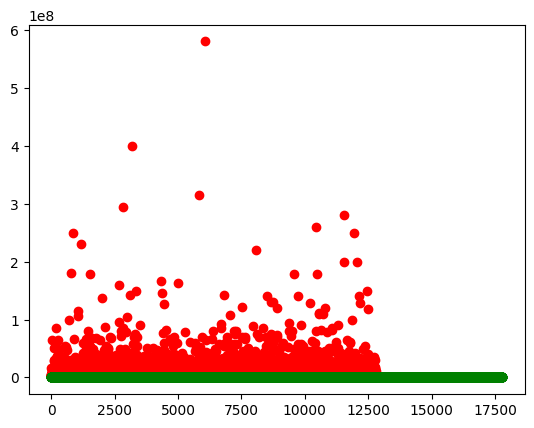

In [21]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c='g');

แปลงค่าหน่วยของคอนโดให้เป็นหลักล้านแล้วรวม data

/tmp/ipython-input-655220356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min']/1000000


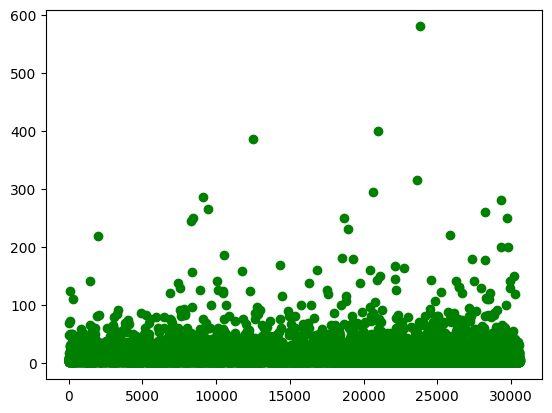

In [22]:
condo['price_min'] = condo['price_min']/1000000
condo_house = pd.concat([house,condo])
plt.scatter(range(len(condo_house['price_min'])),condo_house['price_min'],c='g');

In [23]:
condo_house[condo_house['price_min']>300]['url_unittype'].values

array(['https://baania.com/th/project/อสงไขย-63f6e3b09b028e00130ae6e5/บ้านเดี่ยวสามชั้น-63f6e58e9b028e00130ae6f6',
       'https://baania.com/th/project/บันยัน-ทรี-เรสซิเดนซ์-ริเวอร์ไซด์-กรุงเทพ-15531/penthouse-unittype_36249',
       'https://baania.com/th/project/โฟร์ซีซั่นส์-ไพรเวท-เรสซิเด้นซ์-2540/penthouse-unittype_7639',
       'https://baania.com/th/project/เดอะ-สุโขทัย-เรสซิเด้นซ์-16305/penthouse-unittype_37324'],
      dtype=object)

In [24]:
condo_house[condo_house['price_min']>300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.00,385.0,...,2023-02-23 11:05:42,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11,บ้าน,เขาพระตำหนัก,หนองปรือ,บางละมุง,ชลบุรี,บริษัท อาเมทัส ดีเวลลอปเม้นท์ จำกัด
11071,11195,unittype_36249,project_15531,Penthouse,2,Condo,คอนโด,NaN,844.56,400.0,...,2023-05-27 07:19:29,baania,https://baania.com/th/project/บันยัน-ทรี-เรสซิ...,2023-06-11,คอนโด,คลองสาน,คลองสาน,คลองสาน,กรุงเทพมหานคร,บริษัท เนอวานา ไดอิ จำกัด (มหาชน)
19928,4397,unittype_7639,project_2540,Penthouse,2,Condo,คอนโด,NaN,1050.00,315.0,...,2020-10-14 00:56:43,baania,https://baania.com/th/project/โฟร์ซีซั่นส์-ไพร...,2023-06-11,คอนโด,ยานาวา,ยานนาวา,สาทร,กรุงเทพมหานคร,บริษัท คันทรี่ กรุ๊ป ดีเวลลอปเมนท์ จำกัด (มหาชน)
20668,34097,unittype_37324,project_16305,Penthouse,2,Condo,คอนโด,NaN,1182.00,580.0,...,2020-10-14 00:55:50,baania,https://baania.com/th/project/เดอะ-สุโขทัย-เรส...,2023-06-11,คอนโด,สาทร,ทุ่งมหาเมฆ,สาทร,กรุงเทพมหานคร,บริษัท เอชเคอาร์ อินเตอร์เนชั่นแนล (ประเทศไทย)...


## Column Alignment

สลับ column ของ data condo

In [25]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th_x', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'propertytype_name_th_y', 'neighborhood_name_th', 'subdistrict_name_th',
       'district_name_th', 'province_name_th', 'developer_name_th'],
      dtype='object')

In [26]:
columns_titles = ['ชื่อโครงการ','row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th_x', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'propertytype_name_th_y', 'neighborhood_name_th', 'subdistrict_name_th',
       'district_name_th', 'province_name_th',
       'ชื่อโครงการ_map', 'propertytype_name_th_map',
       'neighborhood_name_th_map', 'subdistrict_name_th_map',
       'district_name_th_map', 'province_name_th_map', 'developer_name_th']

condo_swap = condo.reindex(columns=columns_titles)

In [27]:
condo_swap.head()

,ชื่อโครงการ,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,...,subdistrict_name_th,district_name_th,province_name_th,ชื่อโครงการ_map,propertytype_name_th_map,neighborhood_name_th_map,subdistrict_name_th_map,district_name_th_map,province_name_th_map,developer_name_th
0,NaN,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,...,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน)
4,NaN,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,...,บางค้อ,จอมทอง,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท บิลท์ แลนด์ จำกัด (มหาชน)
8,NaN,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,...,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,...,สีลม,บางรัก,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน)
16,NaN,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,...,จอมพล,จตุจักร,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด


In [28]:
condoswap_house = pd.concat([condo_swap,house])
condoswap_house.tail()

,ชื่อโครงการ,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,...,subdistrict_name_th,district_name_th,province_name_th,ชื่อโครงการ_map,propertytype_name_th_map,neighborhood_name_th_map,subdistrict_name_th_map,district_name_th_map,province_name_th_map,developer_name_th
43361,NaN,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,...,บางใหญ่,บางใหญ่,นนทบุรี,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43363,NaN,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,...,พระลับ,เมืองขอนแก่น,ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท อีสาน พิมานกรุ๊ป จำกัด
43367,NaN,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,...,ไทรน้อย,ไทรน้อย,นนทบุรี,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด
43369,NaN,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,...,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43370,NaN,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,...,คู้ฝั่งเหนือ,หนองจอก,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
condo_swap['price_min_bath'] = condo_swap['price_min']*1000000
condo_swap['price_min_bath']

,price_min_bath
0,3700000.0
4,4200000.0
8,3350000.0
14,15900000.0
16,4700000.0
...,...
43355,NaN
43357,6500000.0
43364,3500000.0
43366,4990000.0


In [30]:
condo_swap.shape

(12806, 42)

In [31]:
house.shape

(17777, 34)

ถ้าเกิด column ไม่เหมือนกันเลยก็ปล่อยไว้แบบนั้น ว่างก็ว่าง

In [32]:
pd.concat([condo_swap,house])

,ชื่อโครงการ,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,...,district_name_th,province_name_th,ชื่อโครงการ_map,propertytype_name_th_map,neighborhood_name_th_map,subdistrict_name_th_map,district_name_th_map,province_name_th_map,developer_name_th,price_min_bath
0,NaN,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,...,ห้วยขวาง,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),3700000.0
4,NaN,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,...,จอมทอง,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),4200000.0
8,NaN,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,...,วัฒนา,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3350000.0
14,NaN,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,...,บางรัก,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),15900000.0
16,NaN,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,...,จตุจักร,กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,4700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,NaN,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.00,...,บางใหญ่,นนทบุรี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43363,NaN,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.00,...,เมืองขอนแก่น,ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท อีสาน พิมานกรุ๊ป จำกัด,NaN
43367,NaN,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.00,...,ไทรน้อย,นนทบุรี,NaN,NaN,NaN,NaN,NaN,NaN,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,NaN
43369,NaN,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,...,เมืองนครราชสีมา,นครราชสีมา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Add Data Source Column

เตรียมปัญหาโดยลบ column property type ออก

In [33]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บ้าน,ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน)
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้าน,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บ้านแฝด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮม,NaN,บ้านพรุ,หาดใหญ่,สงขลา,บริษัท พีวีโฮมมิ่ง จำกัด
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้าน,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด


In [34]:
house = house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th_x'], errors='ignore')
condo = condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th_x'], errors='ignore')

In [35]:
house['data_source'] = 'house'
condo['data_source'] = 'condo'

all_properties = pd.concat([house, condo])
all_properties.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,propertytype_name_th_y,neighborhood_name_th,subdistrict_name_th,district_name_th,province_name_th,developer_name_th,data_source
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บ้าน,ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้าน,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บ้านแฝด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮม,NaN,บ้านพรุ,หาดใหญ่,สงขลา,บริษัท พีวีโฮมมิ่ง จำกัด,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้าน,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,house


# Data reduction

## PCA(X)

ดูใน notebook ``` Ch3_dimensionality_reduction_PCA.ipynb ```

## Sampling (Y-axis data)

- balanced data (class $\hat y$ balance)

In [115]:
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


### สมมติ เราจะสร้าง model ทำนายว่า ข้อมูลที่ให้มาเป็น propertytype แบบไหน (บ้าน หรือ condo)

In [117]:
home = project_df[project_df['propertytype_name_th']=='บ้าน']

In [118]:
condo = project_df[project_df['propertytype_name_th']=='คอนโด']

In [119]:
print(f'home: {home.shape}\n condo: {condo.shape}')

home: (8859, 46)
 condo: (4796, 46)


### เราต้องการ data ที่ balance เพื่อสอน model ที่มีประสิทธิภาพ


เลือก home มาแค่ 4796 rows ```sample()```

In [121]:
home.sample(4796)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
17983,12421.0,5fd0faadee0d7f001240a88d,Baan San Suk Phitsanulok,บ้านแสนสุข พิษณุโลก,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2020-12-09 23:26:21,NaN,2020-12-18 15:30:03,baania,https://baania.com/th/project/บ้านแสนสุข-พิษณุ...,2023-06-11
2257,3945.0,62c7e69bcb0d2c0014be0c2b,The Matias Borommaratchachonnani-Thawiwatthana,เดอะ เมเธียส บรมราชชนนี-ทวีวัฒนา,1,Detached House,บ้าน,12900000.0,developer_10477,"AKRA LAND AND HOUSE CO., LTD.",...,1.0,NaN,1.0,1.0,2022-07-08 15:11:07,NaN,2023-03-22 16:30:03,baania,https://baania.com/th/project/เดอะ-เมเธียส-บรม...,2023-06-11
8878,22829.0,5fd1f166ee0d7f001240a91f,Indochin Place,อินโดจีนเพลส,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2020-12-10 16:59:02,NaN,2020-12-10 18:00:05,baania,https://baania.com/th/project/อินโดจีนเพลส-5fd...,2023-06-11
6882,8287.0,project_3120,Natura Rama 2-Wongwaen Prachauthit,เนเชอร่า พระราม 2-วงแหวน ประชาอุทิศ,1,Detached House,บ้าน,3990000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,1.0,1.0,1.0,2016-12-15 09:19:47,2016-09-30 07:00:00,2020-12-04 10:47:59,baania,https://baania.com/th/project/เนเชอร่า-พระราม-...,2023-06-11
6078,17469.0,project_16402,BAAN LALIN IN THE PARK WONGWAEN - RATTANATHIBET,บ้านลลิล อิน เดอะ พาร์ค วงแหวนฯ - รัตนาธิเบศร์,1,Detached House,บ้าน,2790000.0,developer_4982,NaN,...,1.0,NaN,1.0,1.0,2019-07-12 17:05:09,NaN,2020-12-04 10:43:59,baania,https://baania.com/th/project/บ้านลลิล-อิน-เดอ...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,7039.0,project_14678,Baan Phu Thara Hua Hin,บ้านภูธารา หัวหิน,1,Detached House,บ้าน,7940000.0,developer_10510,NaN,...,1.0,NaN,1.0,1.0,2018-09-21 14:53:47,2023-01-01 07:00:00,2022-06-08 14:00:06,baania,https://baania.com/th/project/บ้านภูธารา-หัวหิ...,2023-06-11
23828,21229.0,project_5119,The Plant Rachapruk,เดอะ แพลนท์ ราชพฤกษ์,1,Detached House,บ้าน,4790000.0,developer_1026,"PRUKSA REAL ESTATE PUB CO., LTD.",...,NaN,NaN,NaN,1.0,2017-03-20 16:40:51,2009-12-31 07:00:00,2023-04-04 10:30:04,baania,https://baania.com/th/project/เดอะ-แพลนท์-ราชพ...,2023-06-11
2625,10772.0,project_3497,The Plant Light Tiwanon-Rangsit,เดอะ แพลนท์ ไลท์ ติวานนท์-รังสิต,1,Detached House,บ้าน,3400000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,1.0,1.0,1.0,1.0,2017-01-23 13:49:42,2019-12-31 07:00:00,2021-01-08 14:30:06,baania,https://baania.com/th/project/เดอะ-แพลนท์-ไลท์...,2023-06-11
12329,21463.0,project_13321,Baan Suan Yu Charoen 3,บ้านสวนอยู่เจริญ 3,1,Detached House,บ้าน,3600000.0,developer_8509,NaN,...,NaN,NaN,NaN,1.0,2018-05-15 20:59:09,NaN,2020-12-04 10:38:30,baania,https://baania.com/th/project/บ้านสวนอยู่เจริญ...,2023-06-11


### กำหนด seed - random_state เพื่อให้ได้ผลการ random เหมือนกันทุกครั้ง

In [125]:
home.sample(random_state=6)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
6802,23208.0,project_12666,Kunapat 1,บ้านคุณาภัทร 1,1,Detached House,บ้าน,2650000.0,developer_5663,NaN,...,0.0,0.0,0.0,1.0,2017-12-20 09:14:14,NaN,2020-12-04 10:43:56,baania,https://baania.com/th/project/บ้านคุณาภัทร-1-p...,2023-06-11


### สุ่ม data มาตามสัดส่วนที่ต้องการ (Frac)

In [128]:
home.sample(frac=0.5, random_state=6).shape

(4430, 46)

สุมแบบหยิบคืน (replace=True)

In [130]:
home.sample(n=10, random_state=6, replace=True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
7293,15880.0,624b087faae18f0013406c8e,Sanransiri Ramkhamhaeng,สราญสิริ รามคำแหง,1,Detached House,บ้าน,7000000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-04-04 22:02:23,NaN,2023-03-09 16:53:12,baania,https://baania.com/th/project/สราญสิริ-รามคำแห...,2023-06-11
22634,7550.0,project_10503,World Villa,เวิลด์วิลล่า,1,Detached House,บ้าน,7500000.0,developer_6811,"World Estate Development Co.,Ltd.",...,NaN,1.0,1.0,NaN,2017-10-04 15:45:29,NaN,2020-12-04 10:46:30,baania,https://baania.com/th/project/เวิลด์วิลล่า-pro...,2023-06-11
12568,17152.0,project_15437,Phanpraugsa Phase 2,พรรณพฤกษา เฟส 2,1,Detached House,บ้าน,3990000.0,developer_8911,NaN,...,1.0,1.0,0.0,1.0,2019-04-29 13:48:39,2019-12-31 07:00:00,2020-12-04 10:31:19,baania,https://baania.com/th/project/พรรณพฤกษา-เฟส-2-...,2023-06-11
22958,12445.0,646de96c5aa9150013a9a9e1,Phanason Resort (Laemhin),พนาสนธิ์ รีสอร์ท (แหลมหิน),1,Detached House,บ้าน,7500000.0,developer_2300,"PHANASON GROUP CO., LTD.",...,NaN,NaN,NaN,1.0,2023-05-24 17:39:40,2014-01-01 07:00:00,2023-05-24 18:00:05,baania,https://baania.com/th/project/พนาสนธิ์-รีสอร์ท...,2023-06-11
17333,10029.0,project_7510,Baan Arpakorn 3,บ้านอาภากร 3,1,Detached House,บ้าน,3990000.0,developer_5206,NaN,...,1.0,NaN,NaN,1.0,2017-05-29 15:47:28,2012-12-31 07:00:00,2020-12-04 10:37:42,baania,https://baania.com/th/project/บ้านอาภากร-3-pro...,2023-06-11
14378,16412.0,project_11938,The Enter Together,ดิ เอ็นเทอร์ ทูเก็ตเทอร์,1,Detached House,บ้าน,2000000.0,developer_5971,"Kanlapaphruek Development Co., Ltd.",...,NaN,NaN,NaN,1.0,2017-11-28 13:37:06,2012-03-31 07:00:00,2020-12-04 10:42:04,baania,https://baania.com/th/project/ดิ-เอ็นเทอร์-ทูเ...,2023-06-11
19451,4742.0,project_426,Preukpirom,พฤกษ์ภิรมย์,1,Detached House,บ้าน,1209000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2015-10-15 11:32:24,NaN,2020-12-04 10:36:42,baania,https://baania.com/th/project/พฤกษ์ภิรมย์-proj...,2023-06-11
11000,10335.0,project_2007,Baan Rungnirun 4,บ้านรุ่งนิรันดร์ โครงการ 4,1,Detached House,บ้าน,850000.0,developer_1362,NaN,...,NaN,NaN,NaN,NaN,2016-09-02 16:42:11,NaN,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านรุ่งนิรันดร์...,2023-06-11
6707,3676.0,project_15755,Baan Suk Chai Villeage,บ้านสุขใจ วิลเลจ,1,Detached House,บ้าน,3200000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2019-06-27 10:53:37,NaN,2020-12-04 10:42:23,baania,https://baania.com/th/project/บ้านสุขใจ-วิลเลจ...,2023-06-11
6291,7652.0,project_6275,Passorn 3 Rangsit Klong 3,ภัสสร 3 รังสิต คลอง 3,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-04-25 17:23:56,NaN,2020-12-04 10:37:04,baania,https://baania.com/th/project/ภัสสร-3-รังสิต-ค...,2023-06-11


### สุ่มแบบ over-sampling

In [132]:
condo.sample(n=8859, random_state=6, replace=True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
13942,5579.0,project_2687,The Plenary Sathorn,เดอะ เพลนเนอรี่ สาทร,2,Condo,คอนโด,2490000.0,developer_1785,GENERAL ENVIRONMENTAL CONSERVATION PUBLIC COMP...,...,NaN,NaN,1.0,1.0,2016-11-23 14:48:42,2015-12-31 07:00:00,2022-10-07 21:00:05,baania,https://baania.com/th/project/เดอะ-เพลนเนอรี่-...,2023-06-11
1385,19608.0,project_2611,The Teak Phattanakarn-Thonglor,เดอะ ทีค พัฒนาการ-ทองหล่อ,2,Condo,คอนโด,2790000.0,developer_1997,NaN,...,1.0,NaN,1.0,1.0,2016-11-21 10:35:58,2016-06-30 07:00:00,2020-12-04 10:48:26,baania,https://baania.com/th/project/เดอะ-ทีค-พัฒนากา...,2023-06-11
10074,1542.0,project_17062,Quintara Treehaus Sukhumvit 42,ควินทารา ทรีเฮาส์ สุขุมวิท 42,2,Condo,คอนโด,4090000.0,developer_2008,NaN,...,1.0,1.0,1.0,1.0,2019-12-02 10:18:07,2020-04-30 07:00:00,2021-01-08 11:30:05,baania,https://baania.com/th/project/ควินทารา-ทรีเฮาส...,2023-06-11
23489,13352.0,project_4205,Phat Condominium,ภัทรคอนโดมิเนียม,2,Condo,คอนโด,313000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,2017-02-27 09:14:35,NaN,2020-12-04 10:40:11,baania,https://baania.com/th/project/ภัทรคอนโดมิเนียม...,2023-06-11
1913,13681.0,project_3464,Zelle Salaya,เซล ศาลายา,2,Condo,คอนโด,1790000.0,developer_1762,"PRINSIRI PUB CO., LTD.",...,1.0,1.0,1.0,1.0,2017-01-23 08:46:55,2019-12-31 07:00:00,2023-04-24 16:00:05,baania,https://baania.com/th/project/เซล-ศาลายา-proje...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,7160.0,project_3008,Blossom Condo @Fashion Altitude,บลอสซั่ม คอนโด แอท แฟชั่น อัลติจูด,2,Condo,คอนโด,2000000.0,developer_1960,"SIAMESE ASSET PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2016-12-08 14:56:28,2017-12-31 07:00:00,2023-04-20 16:30:02,baania,https://baania.com/th/project/บลอสซั่ม-คอนโด-แ...,2023-06-11
6930,3364.0,project_14814,Baan Nub Kluen,บ้านนับคลื่น,2,Condo,คอนโด,3900000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2018-10-08 09:05:03,2009-12-31 07:00:00,2020-12-04 10:41:44,baania,https://baania.com/th/project/บ้านนับคลื่น-pro...,2023-06-11
12093,1706.0,project_6248,The Excel Bearing,ดิเอ็กซ์เซล แบริ่ง,2,Condo,คอนโด,1490000.0,developer_2012,"All Inspire Development Pub Co., Ltd.",...,NaN,NaN,1.0,1.0,2017-04-25 11:43:24,2015-12-31 07:00:00,2021-03-18 15:30:05,baania,https://baania.com/th/project/ดิเอ็กซ์เซล-แบริ...,2023-06-11
16803,20179.0,project_969,NHA Chiang Mai (Night Safari),บ้านเอื้ออาทรจังหวัดเชียงใหม่ (ไนท์ซาฟารี),2,Condo,คอนโด,630000.0,developer_9533,NATIONAL HOUSING AUTHORITY,...,NaN,1.0,NaN,1.0,2015-11-05 13:24:04,NaN,2020-12-04 10:41:21,baania,https://baania.com/th/project/บ้านเอื้ออาทรจัง...,2023-06-11


# PCA (Principle Component Analysis)

Projection

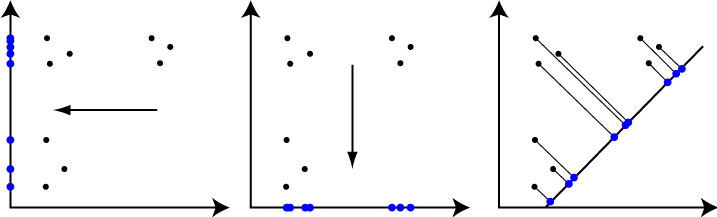



1.   Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)
2.   Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)
3.   Computing the Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)
4.   Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ   eigens ที่จำเป็น)
5.   Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนแกนใหม่)


https://wendynavarrete.com/principal-component-analysis-with-numpy/



# PCA step by step

In [36]:
import pandas as pd

### load data

In [37]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


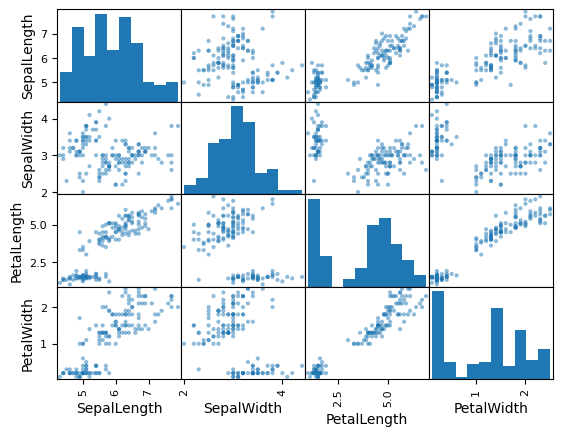

In [38]:
pd.plotting.scatter_matrix(example_df);

In [39]:
import numpy as np

In [40]:
data_matrix = np.array(example_df.iloc[:,:-1])
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
data_matrix = data_matrix.T
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

#1. Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)

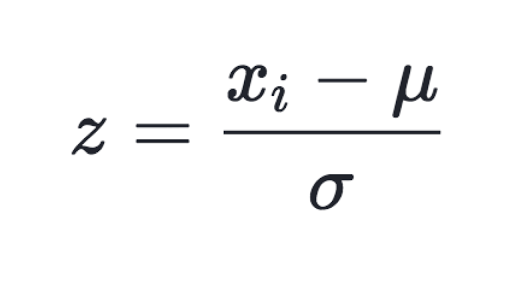

## วิธีซับซ้อน

In [42]:
meanD = np.mean(data_matrix,axis=1)
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [43]:
meanD.shape

(4,)

In [44]:
stdD = np.std(data_matrix,axis=1)
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [45]:
zeromatrix = np.zeros((4,10))
zeromatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
zeromatrix - meanD.reshape((4,1))

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

In [54]:
meanD.reshape((4,1))

array([[5.84333333],
       [3.054     ],
       [3.75866667],
       [1.19866667]])

In [55]:
zeromatrix-meanD.reshape((4,1)) ## reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

#### เลื่อน mean มาที่ 0

In [56]:
data_matrix_m0 = data_matrix - meanD.reshape((4,1))
data_matrix_m0

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [57]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <BarContainer object of 11 artists>)

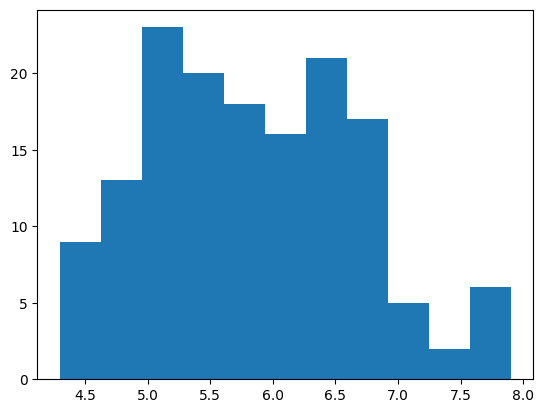

In [58]:
plt.hist(data_matrix[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <BarContainer object of 11 artists>)

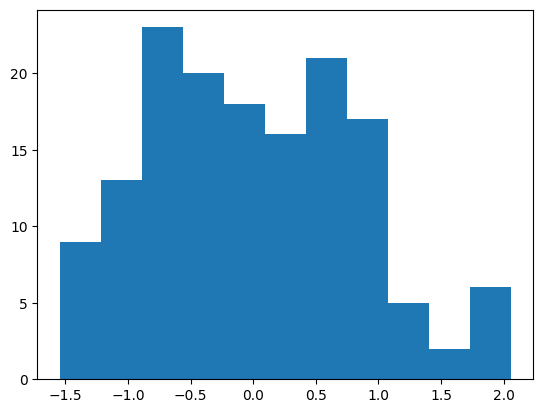

In [59]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <BarContainer object of 11 artists>)

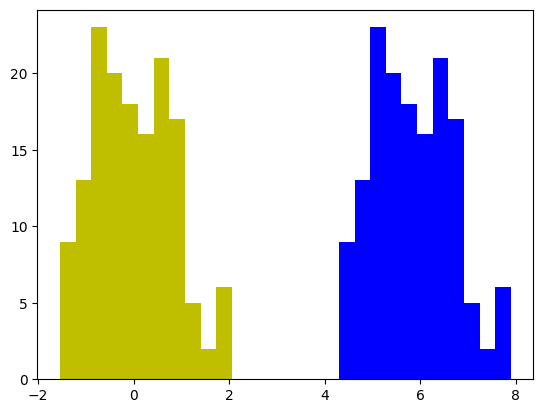

In [60]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

In [61]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.87002413, -1.47347474, -1.07692535, -0.68037595, -0.28382656,
         0.11272284,  0.50927223,  0.90582163,  1.30237102,  1.69892041,
         2.09546981,  2.4920192 ]),
 <BarContainer object of 11 artists>)

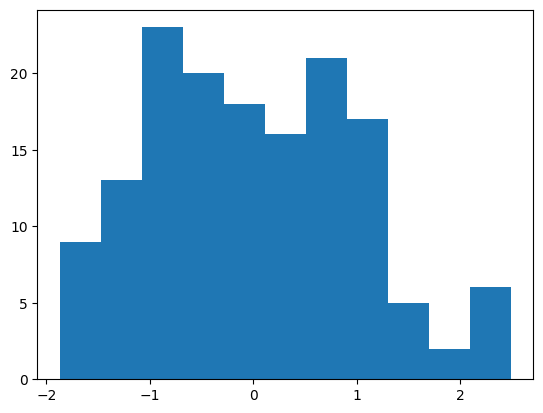

In [62]:
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice')

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <BarContainer object of 11 artists>)

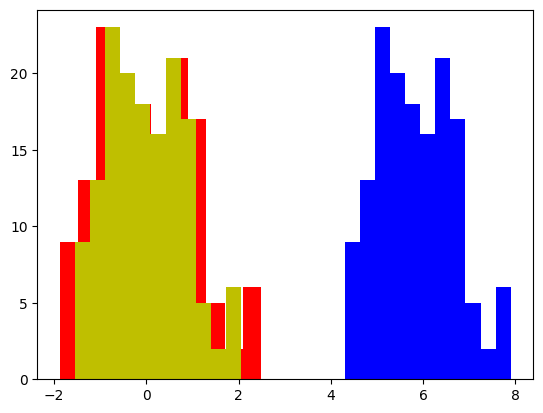

In [63]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

In [64]:
data_matrix_m0_std1

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [65]:
np.mean(data_matrix_m0_std1,axis=1)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [66]:
np.std(data_matrix_m0_std1,axis=1)

array([1., 1., 1., 1.])

## วิธีแบบเร็ว

In [67]:
from scipy import stats

In [68]:
data_matrix_m0_std1_useSTAT = stats.zscore(data_matrix,axis=1)
data_matrix_m0_std1_useSTAT

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <BarContainer object of 11 artists>)

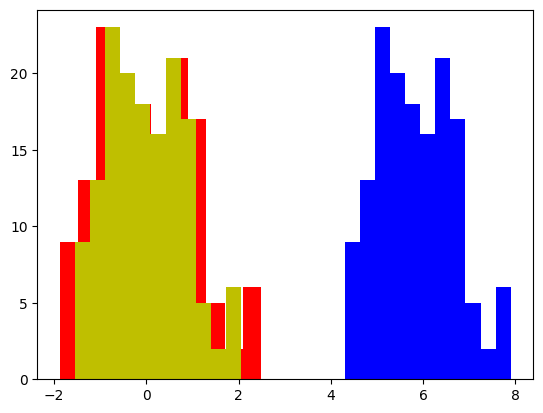

In [69]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1_useSTAT[0,:],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

## 2.   Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)

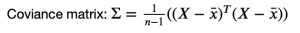

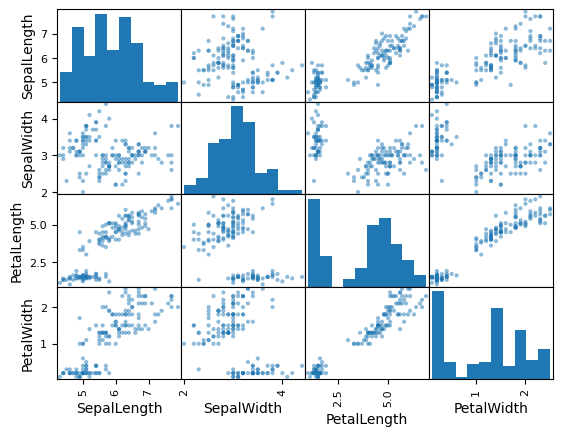

In [70]:
pd.plotting.scatter_matrix(example_df);

In [71]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

#3 คำนวณ Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)

In [75]:
eigen_values, eigen_vectors = np.linalg.eig(data_cov)

In [76]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [77]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

# 4 Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)
คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน

In [78]:
sum(eigen_values)

np.float64(4.026845637583894)

In [79]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[np.float64(72.77045209380135), np.float64(23.03052326768065), np.float64(3.683831957627379), np.float64(0.5151926808906321)]


In [80]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [81]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

# 5   Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนแกนใหม่)

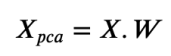

In [82]:
X = data_matrix_m0_std1
X.shape

(4, 150)

In [83]:
W = selected_eigen_vectors
W.shape

(4, 2)

In [84]:
X_pca = X.T.dot(W)
X_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

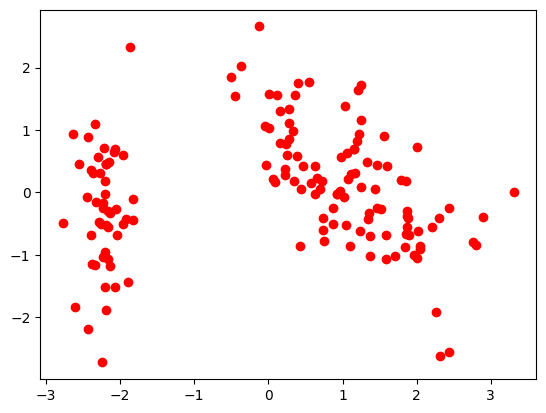

In [85]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')

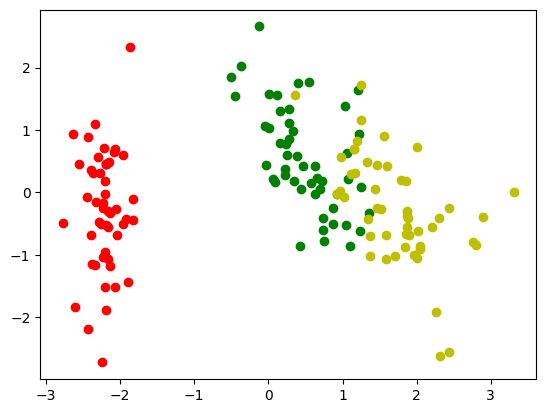

In [86]:
plt.plot(X_pca[:50,0],X_pca[:50,1],'or')
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og')
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')

# PCA

#### Import

In [87]:
from sklearn.decomposition import PCA

#### Define

In [88]:
pca = PCA(n_components=2)

#### Fit - Transform

In [89]:
new_pca = pca.fit_transform(X.T)  ## record - แถว  , dimension - หลัก

In [90]:
new_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

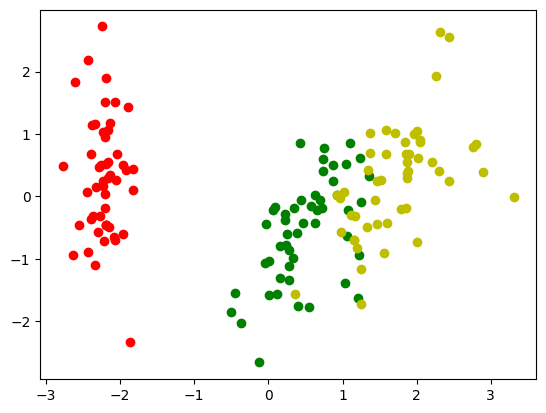

In [91]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

# Example

In [92]:
import pandas as pd

In [93]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'nndb_flat.csv'

## ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [ ]:
data.shape

## ลอง  plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

In [ ]:
# pd.plotting.scatter_matrix(data)

## เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

### เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [94]:
newdata = data.iloc[:,7:]
newdata.head()

NameError: name 'data' is not defined

### ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [ ]:
import numpy as np

In [ ]:
corr = np.corrcoef(newdata.to_numpy().T)

In [ ]:
corr.shape

In [ ]:
corr

In [ ]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i} <=> column = {j} corrcoef = {corr[i,j]}')

In [95]:
newdata.iloc[:5,10:30]

NameError: name 'newdata' is not defined

In [ ]:
from matplotlib import pyplot as plt

### data ที่มี  correlation เป็น 1

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

In [96]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'r.')

NameError: name 'newdata' is not defined

### data ที่มี  correlation เป็นค่าอื่นๆ

In [ ]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.')

 ### ลบ column ซ้ำ

In [97]:
newdata.columns.str.contains('_USRDA')

NameError: name 'newdata' is not defined

In [98]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

NameError: name 'newdata' is not defined

In [99]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

NameError: name 'newdata' is not defined

# Quiz1 ลบ columns  ที่มีค่า  correlation เป็น 1 เมื่อเทียบกับ  column  อื่น

In [ ]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [ ]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### ทดลอง plot กราฟ parallel coordinate

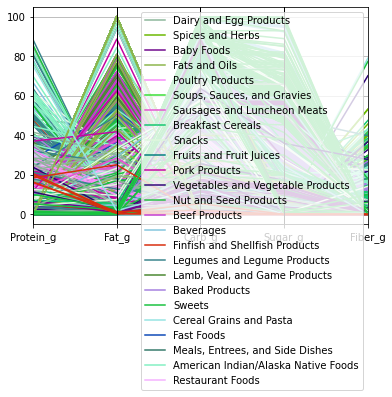

In [ ]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

### ทำ PCA เพื่อลดจำนวน  Dimension  ของข้อมูล

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [ ]:
new_pca.shape

(8618, 2)

In [ ]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

### ดูว่ามี food group อะไรบ้าง

In [ ]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

#### สร้าง ​color list แบบง่าย (เมื่อรันใหม่เลขลำดับอาจจะเปลี่ยนแปลง)

In [ ]:
# color_list = {}
# num = 0
# for each_fg in FG:
#     if each_fg not in color_list:
#         color_list[each_fg] = num
#         num += 1

In [ ]:
# color_list

#### สร้าง color list แบบข้างล่างนี้ ​ลำดับจะไม่มีการเปลี่ยนแปลง

In [ ]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [ ]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

### แทนค่า text ใน  Dictionary ด้วยตัวเลขที่เรากำหนด

In [ ]:
data_dropped2 = data_dropped.replace(color_list2)

In [ ]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Plot กราฟ  Scatter

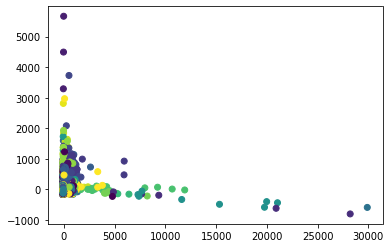

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

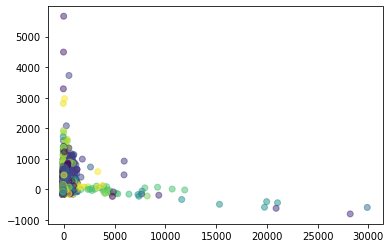

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

### ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ sweet

In [ ]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==8)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
295,1,347.0,0.00,0.02,86.68,57.40,0.0,0.0,0.014,0.00,8.0,1.0,12.0,0.037,0.24,0.062,1.9,0.000000,0.008235,0.0000,0.088889,0.000667,0.0025,0.003563,0.007692,0.012500,0.010000,0.000041,0.016667,0.012857,0.034545,0.002727
296,1,81.0,12.03,2.52,2.43,0.00,0.0,0.0,0.039,1.26,2.1,8.0,5.0,0.148,0.98,0.037,2.9,0.000000,0.022941,0.5250,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
297,1,81.0,12.03,2.52,2.43,0.00,0.0,0.0,0.039,1.26,2.1,8.0,5.0,0.148,0.98,0.037,2.9,0.000000,0.022941,0.5250,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
298,1,81.0,13.12,2.45,1.51,0.00,0.0,0.0,0.049,1.65,0.0,5.0,6.0,0.148,0.76,0.037,3.5,0.000000,0.028824,0.6875,0.000000,0.018667,0.0125,0.178125,0.089231,0.019167,0.005000,0.000164,0.026190,0.140000,0.063636,0.227273
299,1,124.0,14.00,7.10,0.00,0.00,0.0,11.0,0.205,0.99,1.8,2.0,5.0,0.072,1.00,0.000,12.9,0.012222,0.120588,0.4125,0.020000,0.026667,0.0050,0.141813,0.156154,0.121667,0.004167,0.000080,0.023810,0.134286,0.234545,0.206364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,1,389.0,6.60,0.90,88.60,1.35,2.6,0.0,0.090,0.00,250.0,5.0,38.0,0.377,9.00,1.298,16.3,0.000000,0.052941,0.0000,2.777778,0.008667,0.0125,1.577500,1.446154,1.333333,0.031667,0.000419,0.088095,0.361429,0.296364,0.300000
8589,1,91.0,1.00,0.20,21.34,11.36,1.6,0.0,0.260,0.00,21.9,17.0,4.0,0.040,0.30,0.000,1.1,0.000000,0.152941,0.0000,0.243333,0.016667,0.0425,0.033750,0.046154,0.016667,0.003333,0.000044,0.061905,0.028571,0.020000,0.004545
8590,1,68.0,0.30,0.20,16.30,14.66,1.0,2.0,0.060,0.00,12.3,4.0,3.0,0.030,0.10,0.000,0.6,0.002222,0.035294,0.0000,0.136667,0.001333,0.0100,0.008125,0.015385,0.016667,0.002500,0.000033,0.019048,0.012857,0.010909,0.004545
8594,1,73.0,0.50,0.20,17.18,14.87,2.0,3.0,0.070,0.00,12.7,6.0,6.0,0.035,0.17,0.000,0.4,0.003333,0.041176,0.0000,0.141111,0.052667,0.0150,0.017500,0.030769,0.008333,0.005000,0.000039,0.016667,0.012857,0.007273,0.007273


In [ ]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

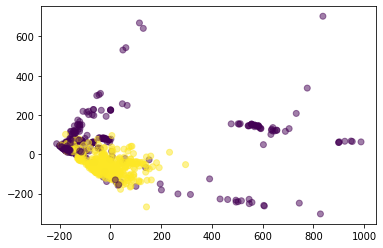

In [ ]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5)

In [ ]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca = pca.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

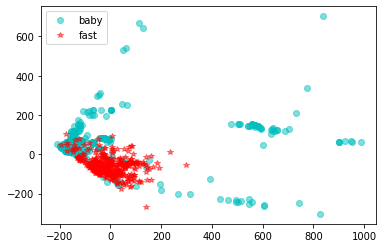

In [ ]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()

### 2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [ ]:
pca.explained_variance_ratio_

array([0.68119676, 0.16898343])

### การใส่ชื่อกราฟ และ แกน

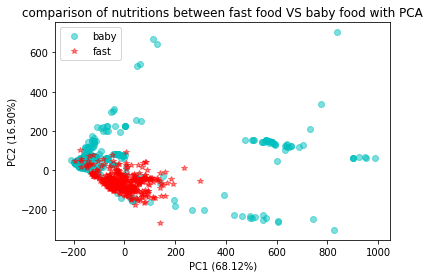

In [ ]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()
plt.title('comparison of nutritions between fast food VS baby food with PCA')
plt.xlabel('PC1 (68.12%)')
plt.ylabel('PC2 (16.90%)');

### ลองทำ PCA ใหม่ เพราะ PC1 + PC2 ยังอธิบายข้อมูลได้ไม่ถึง 90%

In [ ]:
pca = PCA()
new_pca3 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
pca.explained_variance_ratio_

array([6.81196764e-01, 1.68983428e-01, 1.23273387e-01, 1.65517518e-02,
       5.71769252e-03, 1.85803141e-03, 1.10203053e-03, 6.69929682e-04,
       2.33597905e-04, 2.07126430e-04, 1.78102675e-04, 1.94107098e-05,
       3.50360170e-06, 2.96252799e-06, 1.28613636e-06, 4.72018359e-07,
       1.30461474e-07, 1.12069236e-07, 9.31767084e-08, 7.02203952e-08,
       5.91564018e-08, 4.86630880e-08, 8.51053847e-09, 3.13508272e-33,
       3.13508272e-33, 3.13508272e-33, 3.13508272e-33, 3.13508272e-33,
       3.13508272e-33, 3.13508272e-33, 3.13508272e-33])

In [ ]:
sum(pca.explained_variance_ratio_[:3])

0.9734535797566088

In [ ]:
pca2 = PCA(n_components=3)
new_pca3 = pca2.fit_transform(bb.iloc[:,1:].to_numpy())

In [ ]:
new_pca3

array([[ -28.78063378, -116.55183252, -148.53355877],
       [-177.91134481,   18.88378055,   28.68471267],
       [-177.91134481,   18.88378055,   28.68471267],
       ...,
       [-184.18041749,   28.07485153,   35.71512032],
       [-178.64788243,   26.05612238,   33.83158067],
       [-182.08363196,   28.69722116,   46.86794303]])

In [ ]:
baby_pca3 = pca2.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca3 = pca2.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

In [ ]:
baby_pca3

array([[ -28.78063378, -116.55183252, -148.53355877],
       [-177.91134481,   18.88378055,   28.68471267],
       [-177.91134481,   18.88378055,   28.68471267],
       ...,
       [-184.18041749,   28.07485153,   35.71512032],
       [-178.64788243,   26.05612238,   33.83158067],
       [-182.08363196,   28.69722116,   46.86794303]])

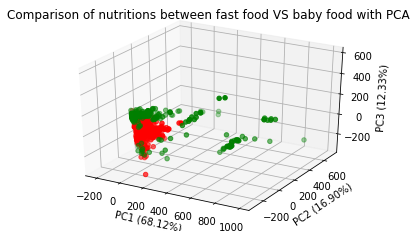

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter3D(baby_pca3[:,0],baby_pca3[:,1],baby_pca3[:,2],c='g')
ax.scatter3D(fast_pca3[:,0],fast_pca3[:,1],fast_pca3[:,2],c='r')
ax.set_title('Comparison of nutritions between fast food VS baby food with PCA')
ax.set_xlabel('PC1 (68.12%)')
ax.set_ylabel('PC2 (16.90%)')
ax.set_zlabel('PC3 (12.33%)');

### Eigen Vectors

3.11513052e-04 = $3.11 x 10^{-4}$

In [ ]:
pca2.components_

array([[ 5.16457294e-01,  1.17568977e-02,  2.52116825e-02,
         6.02127386e-02,  4.46186711e-02,  5.02226073e-04,
         4.21740821e-01,  3.49680421e-04,  1.47650436e-03,
         3.52071169e-02,  1.34682927e-01,  7.27328960e-01,
         4.26801743e-04,  1.77428388e-02,  3.84076891e-03,
         1.71332179e-02,  4.68600912e-04,  2.05694365e-04,
         6.15210148e-04,  3.91190188e-04,  4.19800172e-04,
         3.36707318e-04,  6.20599575e-04,  8.81213179e-04,
         8.17607272e-04,  6.06107467e-04,  4.74224159e-07,
         1.42292116e-04,  6.46585826e-04,  3.11513052e-04,
         4.26655488e-04],
       [-4.98947906e-01, -2.60142479e-02, -2.07749100e-02,
        -5.22119426e-02,  3.80444830e-02, -4.34324580e-03,
         8.47924219e-01, -2.61718387e-04,  5.44759621e-05,
         5.70560587e-02,  3.66959950e-02, -1.42479436e-01,
         2.81558705e-05, -1.64469856e-02,  3.49366232e-03,
        -3.98093057e-02,  9.42138022e-04, -1.53951992e-04,
         2.26983176e-05,  6.33

In [ ]:
import numpy as np

In [ ]:
np.argmax(pca2.components_[0,:])

11